# Titanic Data Science Solutions
- Data Science Solutions book

## 工作流程階段 Workflow stages

在 「book Data Science Solutions」這本書中有解釋到數據工作流程一共有七個階段。

- 1.問題的定義 (Question or problem definition)
- 2.獲取訓練和測試數據 (Acquire training and testing data)
- 3.處理、準備、清理數據 (Wrangle, prepare, cleanse the data)
- 4.分析、識別模式、探索數據 (Analyze, identify patterns, and explore the data)
- 5.建立模型，預測和解決問題 (Model, predict and solve the problem)
- 6.可視化報告和展示問題解決步驟 (Visualize report, and problem solving steps)
- 7.提供或提交結果 (Supply or submit the results)

我們可以結合多個工作流程階段。我們可以通過可視化的數據進行分析。在指定時間之前執行一個階段。可以在整理前和整理後分析數據。在我們的工作流程中多次執行一個階段。這上面七個工作階段主要解決了以下目標

- A.分類(Classifying)：不同類別與我們解決目標的影響或相關性。
- B.關聯性(Correlating)：特徵和解決方案的目標之間是否存在相關性？
- C.轉換(Converting)：將所有特徵轉換為數字等值。例如，將文本的分類值轉換為數字值。
- D.完成(Completing)：完成所有缺失數值的填補。
- E.糾正(Correcting)：檢測我們的樣本或特徵中的任何異常值。
- F.創建(Creating)：在現有特徵或特徵集的基礎上創建新的特徵。
- G.繪圖(Charting)：根據數據的性質和解決方案選擇正確的可視化圖和圖表。

## Question and problem definition 問題定義

- On April 15, 1912, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

- 1912 年 4 月 15 日，泰坦尼克號在與冰山相撞後沉沒，2224 名乘客和船員中有 1502 人遇難。轉化為 32% 的存活率。沉船事故導致生命損失的原因之一是沒有足夠的救生艇供乘客和船員使用。儘管在沉沒中倖存下來有一些運氣成分，但某些人群例如婦女、兒童和上層階級是否比其他人群更有可能倖存下來

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire data 獲取數據

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together. 熊貓幫助我們處理數據集。 

In [2]:
train_df = pd.read_csv('data/titanic-train.csv')
test_df = pd.read_csv('data/titanic-test.csv')
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze by describing data 分析

**Which features are available in the dataset? 可用特徵**

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Which features are numerical? 哪些是數字**

Which features are numerical? Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization. 哪些特徵是數字的？ 在數值特徵中，值是離散的、連續的還是基於時間序列的？ 除其他外，這有助於我們選擇適當的圖表進行可視化。

- Continous: Age, Fare. Discrete: SibSp, Parch.

**Which features are categorical? 哪些特徵是分類的？**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
這些值將樣本分類為相似樣本集。 分類特徵中的值是名義的、有序的、比率的還是基於區間的？ 除其他外，這有助於我們選擇適當的圖表進行可視化。
- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Which features are mixed data types? 哪些特徵是混合數據？**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal. 同一特徵內的數字、字母數字數據。 這些是糾正目標的候選人。
- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. 工單是數字和字母數字數據類型的混合。 客艙是字母數字的。

**Which features may contain errors or typos? 可能包含錯誤或拼寫錯誤？**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. 對於大型數據集，這更難審查，但是從較小的數據集中審查幾個樣本可能會直接告訴我們哪些特徵可能需要更正。
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names. 名稱功能可能包含錯誤或拼寫錯誤，因為用於描述名稱的方式有多種，包括用於替代名稱或短名稱的標題、圓括號和引號。

In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 資料型態與樣本異常值檢測  features

**Which features contain blank, null or empty values? 哪些特徵包含空白、空值或空值？**

- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset. 特徵包含許多空值。
- Cabin > Age are incomplete in case of test dataset. 資料不完整，尤其在測試數據集的情況下。


**What are the data types for various features? 特徵的數據類型是什麼？**

- Seven features are integer or floats. Six in case of test dataset. Five features are strings (object).
- 七個特徵是整數或浮點數。 六個在測試數據集的情況下。 五個特徵是字符串（對象）。


**python.info()**
- 現在這部分我們用 Python 快速查看，利用 Pandas Library 中提供的 info() method 快速找出缺值。簡單來說 info() method 就是定義出關於DataFrame的信息，這些信息包含了列的數量、列的標籤、列的數據類型、內存使用情況、範圍索引和每一列的「非空值」單元格數量等等的，我們直接執行一次看看。
- 我們可以快速得出 RangeIndex: 891 entries 也就是樣本總數為 891 人，而且 Data columns (total 12 columns) 也就是一共有 12 列資料標頭。繼續看下去除了資料型態外，可以注意到有三個數值的非空值單位格不是 891人，分別為 Age(714)、Cabin(204)和 Embarked(889)，換句話說這三個資料型態包含了空值，甚至可以發現剛剛 Excel 沒有特別注意到的 Embarked 欄目也有空值。

In [5]:
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Python.describe()**

- 根據官方公布，鐵達尼號的實際乘客人數為 2224 人，而根據以上訓練數據集中樣本總數為 891 人，也就是佔實際乘客人數的 40% 左右。在整體樣本中是否生存(Survived)是一個存活(1)與死亡(0)的分類特徵，在資料集中有 342 人是存活（1)下來的約佔 38% 的樣本數，代表實際乘客生存率為 32%，這樣解釋可能有點不清楚，我們可以利用Pandas 中的 describe() method 回傳對於 DataFrame 中數據的描述，這種方法快速的描述了每一列資料集的count, mean, std 與百分位數級距。
- 我可以看出在整體樣本中是否生存(Survived)的分類特徵平均值(mean)為 38%，與剛剛計算相同。此外高（>75%） 的乘客沒有和父母或孩子一起旅行，且近 30% 的乘客有兄弟姐妹和/或配偶在船上。我們也能注意到票價差異很大有少部分的乘客票價(Fare)高達(Max)512美元。而最後年齡在 65-80 歲之間的老年乘客很少小於 1%。

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features? 什麼是分類特徵的分佈？**

- 名稱在數據集中是唯一的 Names are unique across the dataset (count=unique=891)
- 性別變量作為兩個可能的值 Sex variable as two possible values with 65% male (top=male, freq=577/count=891)
- 客艙值在樣本中有幾個重複項 Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked 採用三個可能的值 Embarked takes three possible values. S port used by most passengers (top=S)
- 工單功能具有高比例的重複值 Ticket feature has high ratio (22%) of duplicate values (unique=681)

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Analyze by pivoting features 樞紐特徵

在完成工作流程階段（Workflow stages）介紹與異常值糾正後，我們可以根據目前的資料型態進行基本的數據分析的假設，而特徵分析最常使用上的工具莫過於 Excel 中的資料透視表(Pivoting Table)功能，也有另外一種大家更熟悉的稱呼「樞紐分析」，樞紐分析可以讓數據分析師利用最短的時間快速判斷出資料的類型。

- **Pclass**：We observe significant correlation (>0.5) among Pclass=1 and Survived.
- Pclass：我們觀察到 Pclass=1 和 Survived 之間的顯著相關性（>0.5）

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.
- 女性具有非常高的存活率，遍來說，74% 的女性都存活了下來，而只有 18% 的男性存活下來。

In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


- **SibSp&Parch** These features have zero correlation for certain values.To derive a feature or a set of features from thesefeatures .
- SibSp&Parch 這些特徵對於某些值具有零相關性。 從這些單獨的特徵中派生一個特徵或一組特徵。

In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


> we might like to go one step deeper and look at survival by both sex and, say, class. Using the vocabulary of ``GroupBy``: we *group by* class and gender, *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and then *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

我們可能希望進一步了解根據性別和艙位來統計存活率。如果我們用`GroupBy`的方法來描述這個過程：我們使用艙位和性別來*分組*，*選擇*存活狀態，*應用*平均值聚合操作，將結果的分組*組合*起來，然後*展開*成層次化的索引來展示隱藏的高維度。

In [13]:
train_df.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()
#train_df.pivot_table('Survived', index='Sex', columns='Pclass')  #diff way

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multi-level pivot tables 多層透視表

> The grouping in pivot tables can be specified with multiple levels, and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the ``pd.cut`` function:

數據透視表的分組也可以指定多層次，還可以指定其他多個參數。例如我們可能想要將年齡作為第三個維度。我們可以使用`pd.cut`將年齡進行分組：

In [14]:
age = pd.cut(train_df['Age'], [0, 18, 80])
train_df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

> Let's add info on the fare paid using ``pd.qcut`` to automatically compute quantiles:

下面我們在列上加上船票費用分組，使用`pd.qcut`將費用按比例自動分桶：

In [15]:
fare = pd.qcut(train_df['Fare'], 2)
train_df.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'])

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## Analyze by visualizing data 相關性可視化

### Correlating : numerical features 數值相關性

直方圖(histogram chart)對於分析連續數值變量（如年齡）很有用，其中帶狀或範圍將有助於識別有用的模式。直方圖可以使用自動定義的 bin 或等距波段指示樣本的分佈。這有助於我們回答與特定波段相關的問題（嬰兒的存活率更高嗎？）

**Observations.**
- Infants (Age <=4) had high survival rate. 嬰兒（年齡<=4）的存活率很高。
- Oldest passengers (Age = 80) survived. 最年長的乘客（年齡 = 80）倖存下來。
- Large number of 15-25 year olds did not survive. 大量 15-25 歲的人無法生存。
- Most passengers are in 15-35 age range. 大多數乘客的年齡在 15-35 歲之間。
- We should consider Age in our model training. 我們應該在模型訓練中考慮年齡 

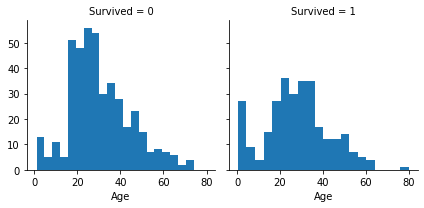

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlating : numerical and ordinal features 序數特徵相關性
我們可以使用單個圖組合多個特徵來識別相關性。 這可以通過具有數值的數值和分類特徵來完成。

**Observations.**

- Pclass=3 had most passengers, however most did not survive. P3 有最多乘客，但大多數沒有倖存
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. P2,P3 嬰兒乘客大多倖存下來
- Most passengers in Pclass=1 survived. P1 大多數乘客倖存下來。
- Pclass varies in terms of Age distribution of passengers. P 因乘客年齡分佈而異。
- Consider Pclass for model training. 考慮使用 Pclass 進行模型訓練。

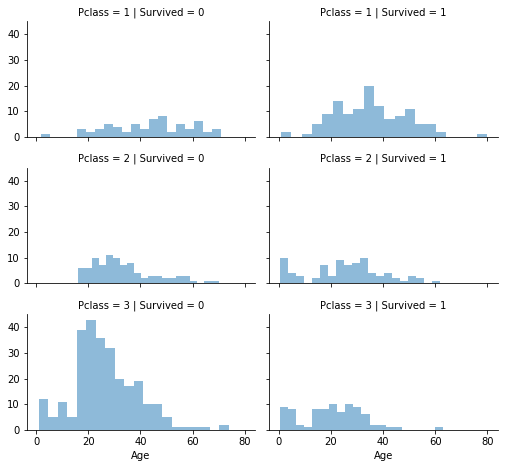

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating : categorical features 分類特徵
現在我們可以將分類特徵與我們的解決方案目標相關聯。

**Observations.**
- Female passengers had much better survival rate than males. 女性乘客的存活率遠高於男性
- Exception in Embarked=C where males had higher survival rate. Embarked=C 中的例外情況，其中男性的存活率較高
- Males had better survival rate in Pclass=3. 男性在 Pclass=3 時的存活率更高 
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. 登船港口的存活率不同
- Add Sex and Embarked feature to model training. 在模型訓練中添加性別

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


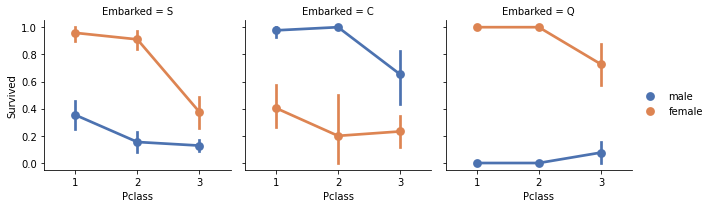

In [18]:
grid = sns.FacetGrid(train_df, col='Embarked')
#grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating : categorical and numerical features 分類和數字特徵
 
我們可能還希望將分類特徵（具有非數字值）和數字特徵相關聯。 我們可以考慮將 Embarked（分類非數字）、Sex（分類非數字）、Fare（連續數字）與 Survived（分類數字）關聯。

**Observations.**

- Higher fare paying passengers had better survival. 更高票價的乘客有更好的生存（創造）
- Port of embarkation correlates with survival rates. 登船港口與存活率相關（關聯與完成）
- Consider banding Fare feature. 考慮捆綁票價功能

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


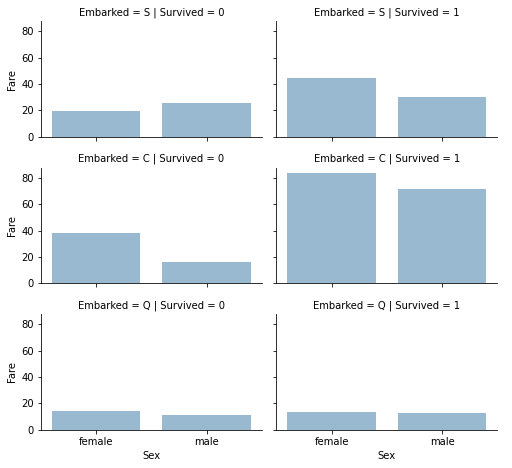

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data 鍛練數據與糾正
到目前為止，我們不需要改變任何一個特徵或數值來達成這些。現在讓我們執行我們假設以糾正、創建和完成目標。


### Correcting by dropping features 通過放棄特徵進行糾正

- By dropping features we are dealing with fewer data points and eases the analysis. 通過放棄特徵我們要處理的數據點更少減輕了分析的難度。
- Based on our assumptions we want to drop the Cabin and Ticket features. 基於我們的假設，我想放棄Cabin 和Ticket 特徵。

In [20]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing 從現有特徵中提取的新特徵
刪除 Name 和 PassengerId 之前分析是否可以設計 Name 來提取標題並測試標題和生存之間的相關性。我們使用正則表達式提取標題特徵。 RegEx 模式 `(\w+\.)` 匹配名稱特徵中以點字符結尾的第一個單詞。 `expand=False` 標誌返回一個 DataFrame。

**Observations.**
- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years. 大多數標題準確地劃分年齡組
- Survival among Title Age bands varies slightly. 生存率略有不同
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer). 某些頭銜大多倖存下來
- We decide to retain the new Title feature for model training. 我們決定為模型訓練保留新的 Title 功能
- We can replace many titles with a more common name or classify them as `Rare`. 常見的名稱替換歸類為"稀有"稱謂

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- 我們可以將分類標題轉換為序數(1,2,3..)
- Convert the categorical titles to ordinal. We can convert the categorical titles to ordinal.

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Converting a categorical feature 轉換分類特徵

現在我們可以將包含字符串的特徵轉換為數值。來符合大多數模型算法所要求。
- Converting Sex feature to a new feature called Gender where female=1 and male=0. 將 Sex 特徵轉換為新特徵。

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature 完成一個數值連續特徵

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

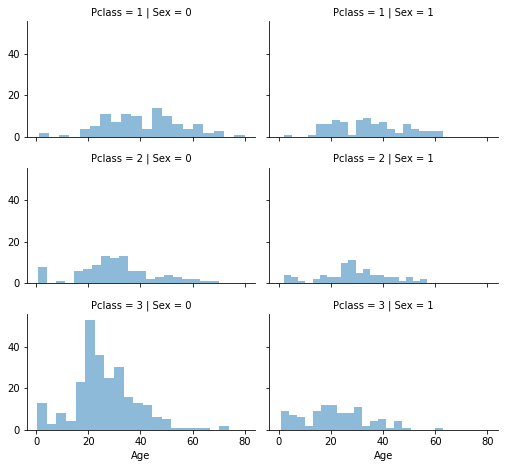

In [24]:
#grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [25]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,7.8292,2,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,7.0000,0,3,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,9.6875,2,1,1,6
3,895,3,"Wirz, Mr. Albert",0,1,8.6625,0,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0,3,0,3


We can not create FareBand.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,1,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,1,0,1,1,6
5,6,0,3,"Moran, Mr. James",0,1,1,2,1,1,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,3,0,1,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,2,0,4,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,1,0,3,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,2,1,3,0,0


And the test dataset.

In [39]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,0,2,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,0,0,3,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,1,2,1,1,6
3,895,3,"Wirz, Mr. Albert",0,1,1,0,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,0,3,0,3
5,897,3,"Svensson, Mr. Johan Cervin",0,0,1,0,1,1,0
6,898,3,"Connolly, Miss. Kate",1,1,0,2,2,1,3
7,899,2,"Caldwell, Mr. Albert Francis",0,1,2,0,1,0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,1,3,1,3
9,901,3,"Davies, Mr. John Samuel",0,1,2,0,1,0,3


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 9))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)

## Workflow assumptions 工作流假設 (7C)

**Classifying 分類**： 根據資料集描述添加我們的假設。

1. Women (Sex=female) were more likely to have survived. 女性更有可能存活
2. Children (Age<X) were more likely to have survived.  兒童更有可能存活下來
3. The upper-class passengers (Pclass=1) were more likely to have survived. 上層乘客更有可能生還

**Correlating 相關**：每個特徵與生存的相關性如何。

**Converting 轉換**：將所有特徵轉換為數值等效值。例如，將文本分類值轉換為數值。

**Completing 完成**：數據準備還可能需要我們估計特徵中的任何缺失值。當沒有缺失值時，模型算法可能效果最好。

1. complete Age feature as it is definitely correlated to survival. 年齡特徵因為肯定與生存相關
2. complete the Embarked feature as it may also correlate with survival or another important feature. 可能關聯

**Correcting 修正**：檢測任何異常值。如果某個特徵對分析沒有貢獻，也可丟棄它。

1. Ticket may be dropped,it contains high ratio of duplicates (22%) and not be correlation between Ticket&survival.
2. Cabin may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

- Ticket 特徵可能會從我們的分析中刪除，因為它包含很高的重複率 (22%)，並且 Ticket 和生存之間可能沒有相關性。
- Cabin 特徵可能被丟棄，因為它在訓練和測試數據集中高度不完整或包含許多空值。
- PassengerId 可能會從訓練數據集中刪除，因為它對生存沒有幫助。
- 名字特徵比較不規範，可能對生存沒有直接的貢獻，所以可能會被丟棄。

**Creating 創造**：基於現有特徵或一組特徵創建新特徵，使得新特徵遵循相關性、轉換性、完整性目標。

1. create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. engineer the Name feature to extract Title as a new feature.
3. create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. create a Fare range feature if it helps our analysis.

- 我們可能希望基於 Parch 和 SibSp 創建一個名為 Family 的新功能，以獲取船上的家庭成員總數。
- 我們可能想設計名稱特徵來提取標題作為一個新特徵。
- 我們可能想為年齡段創建新功能。這會將連續的數值特徵變成有序的分類特徵。
- 如果它有助於我們的分析，我們可能還想創建一個票價範圍特徵。

**Charting 製圖**：根據數據的性質和解決方案目標選擇正確的可視化圖和圖表。